<a href="https://www.kaggle.com/code/zakiamahmoudi/using-roc-metric-to-compare-classifiers?scriptVersionId=103798883" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Making Receiver Operating Characteristic (ROC) curve to compare three classification algorithms' performance ( Random Forest, Naive Bayes, Logistic Regression) on the Pima Indians Diabetes Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


## **What is ROC curve?**

The **ROC curve** summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the **False Positive Rate (FPR)** on the *X-axis* and the **True Positive Rate (TPR)** on the *Y-axis*.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

### 1- Import the Dataset and Relevant Labraries

In [2]:
### Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

%matplotlib inline

In [3]:
     
data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
print(data.shape)
data.head(3)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### 2- Discover and preprocess the data

In [4]:
# check if any null value is present
data.isnull().values.any()

False

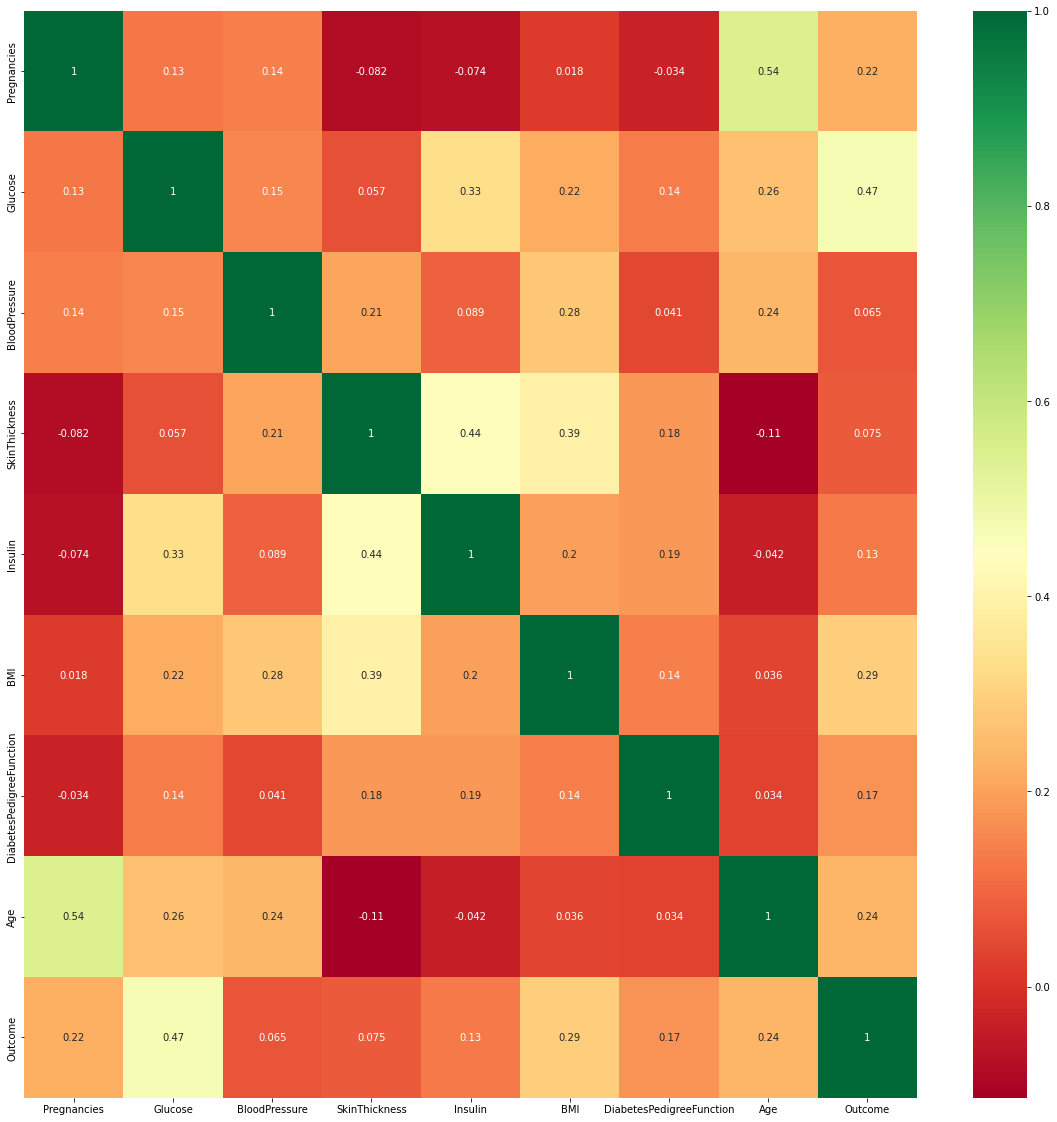

In [5]:
## Correlation
#get correlations of each features in the dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot the heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [6]:
# change some columns' names :
data.columns=['num_preg','glucose', 'blood_pres','Skinthickness','insulin','bmi','diab_pred','age','diabetes']
data.head(3)

,num_preg,glucose,blood_pres,Skinthickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [7]:
# Determine the number of 0s and 1s in the outcome variable :
diabetes_true_count = len(data.loc[data['diabetes'] == 1])
diabetes_false_count = len(data.loc[data['diabetes'] == 0])
print('1s :', diabetes_true_count,'  0s :',diabetes_false_count)

1s : 268   0s : 500


In [8]:
## Check how many other zeros in each column :
print("total number of rows : {0}".format(len(data)))
for col in data.columns[:-1]:
    print("number of zeros ", col,"{0}".format(len(data.loc[data[col] == 0])))

total number of rows : 768
number of zeros  num_preg 111
number of zeros  glucose 5
number of zeros  blood_pres 35
number of zeros  Skinthickness 227
number of zeros  insulin 374
number of zeros  bmi 11
number of zeros  diab_pred 0
number of zeros  age 0


In [9]:
# Fill the missing values with the column mean 
imputer = SimpleImputer(missing_values=0, strategy='mean')
X_train = imputer.fit_transform(data.loc[:, :'age'])

### 3- Split the data into train and test sets

In [10]:
## Split the data into train and test splits :
XX=data.loc[:, :'age'].values
YY=data.loc[:, 'diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size = .2, random_state=0)

### 4- Apply Algorithms

In [11]:
## a. Random Forest
random_forest_model = RandomForestClassifier(random_state=0, max_features=5, n_estimators=500)
random_forest_model.fit(X_train, y_train)
predict_train_data_rf = random_forest_model.predict(X_test)
print("Accuracy for  Random Forest = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data_rf)))

Accuracy for  Random Forest = 0.812


In [12]:
## b. Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
predict_train_data_nb = naive_bayes_model.predict(X_test)
print("Accuracy for Naive Bayes = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data_nb)))

Accuracy for Naive Bayes = 0.792


In [13]:
## c. Logistic Regression
logistic_regression_model = LogisticRegression(random_state=0)
logistic_regression_model.fit(X_train, y_train)
predict_train_data_lr = logistic_regression_model.predict(X_test)
print("Accuracy for Logistic Regression = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data_lr)))

Accuracy for Logistic Regression = 0.825


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [14]:
## Predict probabilities for the positive outcome (= 1)

r_probs = [0 for _ in range(len(y_test))]
rf_probs = random_forest_model.predict_proba(X_test)
nb_probs = naive_bayes_model.predict_proba(X_test)
lr_probs = logistic_regression_model.predict_proba(X_test)

rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]

### 5- Computing AUROC and ROC curve values
**ROC** is the receiver operating characteristic
**AUROC** is the area under the ROC curve

In [15]:
### Calculate AUROC
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [16]:
### Print AUROC scores
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.855
Naive Bayes: AUROC = 0.841
Logistic Regression: AUROC = 0.867


In [17]:
### Calculate ROC curve
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

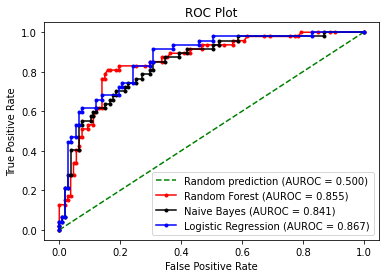

In [18]:
## Plot the ROC curve
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc, color='g')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc, color='red')
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc, color='black')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc, color='b')

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [19]:
print('Logistic Regression AUROC = %.3f' % lr_auc )

Logistic Regression AUROC = 0.867


<!--  -->

<!--  -->

<!--  -->

<!--  -->

By comparing the AUROC results, we see that the Logistic Regression model performed better toclassify the data than the Naive Bayes and the Random forest models ,,, ((The precision results show the same order of performance)